# Lab 3

## Estimate parameters for degree distribution

$\textbf{Exercise 1}$

In this task you are asked to calculate the degree destribution when $p \cdot n=1$ and when $p\cdot n\to +\infty$ and estimate parameter $\lambda$ for Poisson cases and $\mu,\sigma^2$ for Gaussian case.

$\textbf{Solution}$

The first part.

Firstly, the random graphs with parameters $p \cdot n=1$ was generated using standard functions from *NetworkX* package.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline

In [2]:
GP = nx.fast_gnp_random_graph(1000, 0.001)

Secondly, degree distribution for this case ($p \cdot n=1$) was calculated and plotted. As it can be seen the degree distribution is close to Poisson.

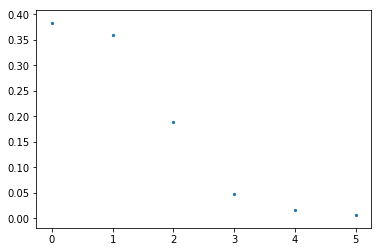

In [44]:
k = GP.degree()
nod = nx.number_of_nodes(GP)
k_sort = np.array(k.values())
kset = list(set(k_sort))
#kset = [x for x in kset if x!=0]

deg = [0]*len(kset)
for i in range(len(kset)):
    for j in range(len(k_sort)):
        if k_sort[j]==kset[i]:
            deg[i]=deg[i]+1

for i in range(len(deg)):     
    deg[i] = float(deg[i])/float(nod)


plt.scatter(kset, deg, s=5)
plt.show()

Thirdly, a parameter $\lambda$ was estimated using formula $\hat \lambda_{MLE} = \Sigma_{i=1}^n \frac{k_i}{n}$:

Let $X_1, X_2, ..., X_n$ is a sample of size n from Poisson distribution, where $\lambda>0$. We need to find an estimated value $\hat \lambda$ of $\lambda$.

$L_n = \prod_{i=1}^n \frac{\lambda^{X_i}}{X_i!} e^{-\lambda} = \frac {\lambda^{\Sigma_{i=1}^n X_i}}{\prod_{i=1}^n X_i!} e^{-n \lambda}$

$l_n = ln\left( \frac {\lambda^{\Sigma_{i=1}^n X_i}}{\prod_{i=1}^n X_i!} e^{-n \lambda} \right) = \Sigma_{i=1}^n X_i ln \left( \lambda \right) - ln \left( \prod_{i=1}^n X_i! \right) - n \lambda $

$\frac {\partial l_n}{\partial \lambda} = \frac{\Sigma_{i=1}^n X_i}{\lambda} - n$

Consequently, $\hat \lambda_{MLE} = \Sigma_{i=1}^n \frac{X_i}{n}$.

In [45]:
lamb = np.mean(k_sort)
lamb

0.97399999999999998

As it can be seen below Poisson distribution with parameter $\lambda = 0.974$ (red dots) is quite close to empirical distribution (blue dots).

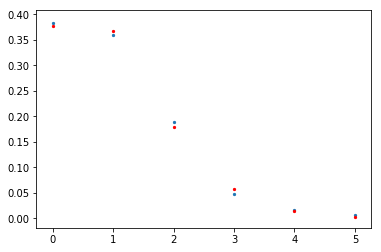

In [47]:
import math
ppdf = []
for i in range(len(kset)):
    ppdf.append((lamb**kset[i])/(np.exp(lamb)*math.factorial(kset[i])))
plt.scatter(kset, deg, s=5)
plt.scatter(kset, ppdf, s=5, color='red')
plt.show()

The second part.

Firstly, the random graphs with parameters $p \cdot n \to + \infty$ was generated using standard functions from *NetworkX* package.

In [42]:
GG = nx.gnp_random_graph(10000, 0.1)

Secondly, degree distribution for the this case was calculated and plotted. As it can be seen the degree distribution is close to Normal.

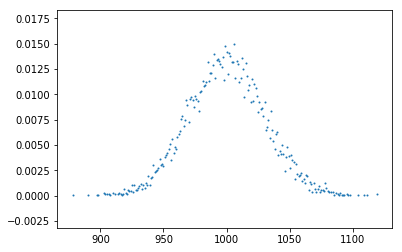

In [48]:
k = GG.degree()
nod = nx.number_of_nodes(GG)
k_sort = np.array(k.values())
kset = list(set(k_sort))
#kset = [x for x in kset if x!=0]

deg = [0]*len(kset)
for i in range(len(kset)):
    for j in range(len(k_sort)):
        if k_sort[j]==kset[i]:
            deg[i]=deg[i]+1

for i in range(len(deg)):     
    deg[i] = float(deg[i])/float(nod)


plt.scatter(kset, deg, s=1)
plt.show()

Thirdly, parameters $\mu $ and $\sigma^2$ were estimated using formulae: $\hat \mu_{MLE} = \Sigma_{i=1}^n \frac{k_i}{n} = \bar k$, $\hat \sigma_{MLE}^2 = \frac {1}{n} \Sigma_{i=1}^n  {\left( k_i - \bar k \right)^2}$.:

Let $X_1, X_2, ..., X_n$ is a sample of size n from $\mathcal{N} \left( \mu, \sigma^2 \right)$. We need to find an estimated values $\hat \mu, \hat \sigma^2$ of parameters.

$L_n = \prod_{i=1}^n \frac {1}{\sqrt{2\Pi \sigma^2}} e^{-\frac {(X_i - \mu)^2}{2\sigma^2}} = \frac {1}{(2\Pi \sigma^2)^{\frac{n}{2}}} e^{\frac {\Sigma_{i=1}^n (X_i - \mu)^2}{2\sigma^2}}$

$l_n = -\frac {n}{2} ln\left(2\Pi\right) -\frac {n}{2} ln\left(\sigma^2 \right)- \frac {\Sigma_{i=1}^n (X_i - \mu)^2}{2\sigma^2} $

$\frac {\partial l_n}{\partial \mu} = \frac{2\Sigma_{i=1}^n (X_i - \mu)}{2\sigma^2} = \frac{\Sigma_{i=1}^n (X_i - \mu)}{\sigma^2}, \frac {\partial l_n}{\partial \sigma^2} = -\frac {n}{2\sigma^2} + \frac {\Sigma_{i=1}^n (X_i - \mu)^2}{2\sigma^4} $

Consequently, $\hat \mu_{MLE} = \Sigma_{i=1}^n \frac{X_i}{n} = \bar X$, $\hat \sigma_{MLE}^2 = \frac {1}{n} \Sigma_{i=1}^n  {\left( X_i - \bar X \right)^2}$.

In [49]:
mu = np.mean(k_sort)
sigma = 0.0
for i in range(len(k_sort)):
    sigma = sigma+(k_sort[i]-mu)**2
sigma = float(sigma)/len(k_sort)
print(mu, sigma)

(999.66880000000003, 898.4329065600011)


As it can be seen below Normal distribution with parameters $\mu = 1000.2$, $\sigma = 907.1$ (red dots) is quite close to empirical distribution (blue dots).

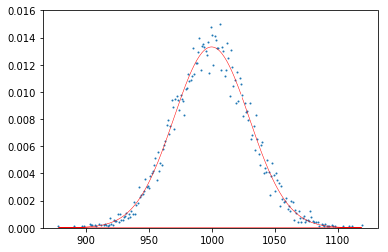

In [50]:
import matplotlib.mlab as mlab
plt.plot(kset,mlab.normpdf(kset, mu, np.sqrt(sigma)), linewidth=0.5, color='red')
plt.scatter(kset, deg, s=1)
axes = plt.gca()
axes.set_ylim([0,0.016])
plt.show()

$\textbf{Exercise 2}$

Find distributions in limit $n\to+\infty$ for degree destribution in Erdos model (use LATEX environment inside MarkDown Cell)

Hint: There are two cases that you should find from emprical data above

$\textbf{Solution}$

It is known that probability that i-th node has a degree $k_i=k$ is equal to $P(k_i=k)=P(k)=C_{n-1}^k p^k (1-p)^{n-1-k}$, where 

1) The first case is $n \to \infty$ and $pn$ is a constant.

Put $\lambda = np$, then $p = \frac {\lambda}{n}$.

Rewrite P(k) in terms of $\lambda$, $n$, $k$.

$P(k)=C_{n-1}^k \left(\frac{\lambda}{n} \right)^k \left(1-\frac{\lambda}{n}\right)^{n-1-k} = \frac{(n-1)(n-2)...(n-k)}{k!} \frac{\lambda^k}{n^k} \left(1-\frac{\lambda}{n}\right)^{n-1-k} = \frac{(n-1)(n-2)...(n-k)}{n^k} \frac{\lambda^k}{k!} \left(1-\frac{\lambda}{n}\right)^{n-1-k} = \frac {n-1}{n} \frac{n-2}{n} ... \frac{n-k}{n} \frac{\lambda^k}{k!} \left(1-\frac{\lambda}{n}\right)^{n-1-k} = \frac {n-1}{n} \frac{n-2}{n} ... \frac{n-k}{n} \frac{\lambda^k}{k!} \left(1-\frac{\lambda}{n}\right)^{n} \left(1-\frac{\lambda}{n}\right)^{-k-1}$

Since $n \to \infty$, $\lambda$ and $k$ are fixed

$\lim_{n \to \infty} \frac {n-1}{n} = 1$, $\lim_{n \to \infty} \frac {n-2}{n} = 1$ and so on;

$\lim_{n \to \infty} \left(1-\frac{\lambda}{n}\right)^{-k-1} = 1$;

$\lim_{n \to \infty} \left(1-\frac{\lambda}{n}\right)^{n} = e^{-\lambda}$ (the second remarkable limit),

then

$P(k) = \frac{\lambda^k}{k!} e^{-\lambda}$.

2) The second case is $n \to \infty$ and $n \cdot p \to \infty$.

Put a node $i$, let $X_{i1}$ be a RV which is equal to presence of an edge between the $i$-th node and the first one, $X_{i2}$ be a RV which is equal to presence of an edge between the $i$-th node and the second one and so on. $X_{ij} \sim Bernoulli(p)$.

Then the sum of these RVs is equal to $Y_i$, where $Y_i$ is a RV which is equal to degree of the $i$-th node. Then we need to show that the sum of these RVs $S_n$ (which have Bernoulli distribution) has Normal distribution.

Since 

* $X_{i1}$, $X_{i2}$, ..., $X_{i(n-1)}$ are $iid$,
* $X_{i1}$, $X_{i2}$, ..., $X_{i(n-1)} \sim Bernoulli(p)$
* Expected value of these RVs is equal to $p$, distribution of them is equal to $pq$

It can be said that $\frac {S_n - np}{\sqrt {npq}} \to \mathcal{N} \left(0, 1 \right)$ (Central Limit Theorem).

It means that $\frac {S_n - np}{\sqrt {npq}}$ converges in distribution to a standard normal random variable, as $n \to \infty$: $\lim_{n\to \infty} P(\frac {S_n - np}{\sqrt {npq}} < a) = P(\xi < a)$.

Since $P(\xi < a) = \frac {1}{\sqrt {2 \Pi}} \int_{-\infty}^a e^{- \frac{t^2}{2}} dt = \begin{bmatrix} t = \frac{z-np}{\sqrt {npq}} \\ dt = \frac{1}{\sqrt {npq}} dz \end{bmatrix} =\frac {1}{\sqrt {2 \Pi}} \int_{-\infty}^{a\sqrt{npq}+np} e^{- \frac{\left( z-np\right)^2}{2npq}} \frac {1}{\sqrt {npq}} dz = P(\eta < a\sqrt{npq}+np)$, where $\eta \sim \mathcal{N} \left(\mu, \sigma^2 \right)$ we can derive that

$\lim_{n\to \infty} P(S_n < a\sqrt{npq}+np) = P(\eta < a\sqrt{npq}+np)$.

It means that $S_n$ converges in distribution to a normal random variable with parameters $\mu = np$, $\sigma^2 = npq$:

$S_n \to \mathcal{N} \left(np, npq \right)$, consequently, $Y_i \to \mathcal{N} \left(np, npq \right)$.